# EXTRACTIVE SUMMARIZATION
# Sentence Scoring

In [132]:
from nltk.corpus import stopwords
import networkx as nx
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
from collections import Counter
import re

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [133]:
## Stopwords removal using the stopwords corpus from nltk
## Counting the number of each words in the text
## This could be done easily with the help of a dictionary
dic = dict()
count = 0    ## Number of words (excluding stop words in the text)
with open("cnn","r") as text:
    for line in text:
        for word in line.split(' '):
            word = word.strip()
            if word not in stopwords.words('english'):
                count = count + 1
                try:
                    dic[word] += 1
                except:
                    dic[word] = 1
## Term-frequency of each word is its frequncy divided by the total number of words
## Printing each word in the text and its frequency
for key in dic:
    dic[key] = float(dic[key])/count    ## Term frequency
    print key + " : " + str(dic[key])

soon : 0.00617283950617
violent : 0.00617283950617
behind : 0.00617283950617
staff : 0.00617283950617
police : 0.00617283950617
workers : 0.037037037037
pump : 0.00617283950617
thursday : 0.00617283950617
labor : 0.00617283950617
clashes : 0.00617283950617
parts : 0.00617283950617
fuel : 0.00617283950617
local : 0.00617283950617
easier : 0.00617283950617
hope : 0.00617283950617
stocked : 0.00617283950617
government : 0.00617283950617
familiar : 0.00617283950617
stop : 0.00617283950617
refineries : 0.00617283950617
words : 0.00617283950617
world : 0.00617283950617
governments : 0.0123456790123
prime : 0.00617283950617
tear : 0.00617283950617
companies : 0.0123456790123
worried : 0.00617283950617
leave : 0.00617283950617
intensification : 0.00617283950617
withdrawal : 0.00617283950617
difficult : 0.00617283950617
people : 0.0123456790123
proposals : 0.00617283950617
back : 0.00617283950617
tires : 0.00617283950617
culture : 0.00617283950617
best : 0.00617283950617
might : 0.0061728395061

In [134]:
## Calculating the term frequency of each of the sentence
## dic contains the term frequncy score of each sentence as a dictionary to the sentence in the document
tf = dict()
with open("cnn","r") as text:
    for line in text:
        score = 0
        for word in line.split(' '):
            word = word.strip()
            if word not in stopwords.words('english'):
                score = score + dic[word]
        ##print line + " : " + str(score)
        tf[line] = score
for i in tf:
    print i + ":" + str(tf[i])

the workers are protesting a labor reform bill put forward by the government that will make it easier for companies to hire and fire employees
:0.148148148148
but workers unions friday responded with a call to step up rallies and blockades demanding a complete withdrawal of the bill
:0.148148148148
such scenes are being played out across the country friday as unions have called for workers to step up protests that have for the past week crippled parts of france
:0.185185185185
burning tires tear gas and clashes with riot police the ugly scenes that come with workers strikes are all too familiar in france a country constantly trying to balance its culture of workers rights with a more efficient economy
:0.234567901235
employees of oil refineries nuclear power plants and some public transportation have left one in three gas stations dry forcing vehicles to search for well stocked stations and causing long lines at the pump
:0.179012345679
we call for the continuation and intensification 

# Sentence Clustering

In [135]:
'''## STATISTICAL SIMILARITY
def statistical(si,sj):
    ## Stemming the strings so that they donot contain any verb forms
    stemmer = nltk.stem.porter.PorterStemmer()
    remove_punctuation_map =dict((ord(char),None) for char in string.punctuation)
    def stem_tokens(tokens):
        return [stemmer.stem(item) for item in tokens]
    ## Normalizing the text i.e removing both the verb forms and also the punctuation if any
    def normalize(text):
        return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))
    ## Vectorizing the string inputs to be used to calculate the cosine similarity
    vectorizer = TfidfVectorizer(tokenizer = normalize,stop_words = 'english')
    tfidf = vectorizer.fit_transform([si,sj])
    ## Calculating the cosine similarity
    return ((tfidf * tfidf.T).A)[0,1]
for i in G.nodes():
    for j in G.edges():
        print statistical(i,j)
'''
def statistical(sen1, sen2):
    #sen1 = sen1.strip().split()
    #sen2 = sen2.strip().split()
    #Case Insensitive Cosine Similarity
    count1 = Counter(w.lower() for w in re.findall(r"\w+", sen1))
    count2 = Counter(w.lower() for w in re.findall(r"\w+", sen2))
    intxn = set(count1.keys()) & set(count2.keys())
    num = sum([count1[x] * count2[x] for x in intxn])
    mod1 = sum([count1[x]**2 for x in count1.keys()])
    mod2 = sum([count2[x]**2 for x in count2.keys()])
    den = sqrt(mod1)*sqrt(mod2)
    return float(num)/den
for i in G.nodes():
    for j in G.nodes():
        print statistical(i,j)

1.0
0.321028941562
0.32075014955
0.274928699614
0.218536689369
0.290957186981
0.388888888889
0.264135271898
0.209980262783
0.339683110243
0.321028941562
1.0
0.312771621086
0.387241054677
0.169127522873
0.433460723432
0.2106752429
0.190788900225
0.0455015755193
0.204465205027
0.32075014955
0.312771621086
1.0
0.261904761905
0.216295228174
0.346467433592
0.264618873379
0.254164283888
0.145478593491
0.228802157661
0.274928699614
0.387241054677
0.261904761905
1.0
0.162221421131
0.269974623578
0.247435829653
0.17428408038
0.155869921597
0.168099544404
0.218536689369
0.169127522873
0.216295228174
0.162221421131
1.0
0.245255735794
0.140487871737
0.197908278398
0.106198848811
0.190885428893
0.290957186981
0.433460723432
0.346467433592
0.269974623578
0.245255735794
1.0
0.327326835354
0.259375687967
0.0
0.259437260831
0.388888888889
0.2106752429
0.264618873379
0.247435829653
0.140487871737
0.327326835354
1.0
0.330169089872
0.0629940788349
0.254762332683
0.264135271898
0.190788900225
0.25416428388

In [136]:
## SEMANTIC SIMILARITY
## Calculating the semantic similarity between two sentences using WordNet
def semantic_score(word1, word2):
    try:
        w1 = wn.synset('%s.n.01'%(word1))
        w2 = wn.synset('%s.n.01'%(word2))
        return wn.path_similarity(w1,w2,simulate_root = False)
    except:
        return 0
## Calculate the semantic score of two sentences
## What should be the method to normalize these scores? I divided the result by total number of comparisons
def sentence_semantic(string1, string2):
    score,count = 0,0
    token1 = nltk.word_tokenize(string1)
    token2 = nltk.word_tokenize(string2)
    for t1 in nltk.pos_tag(token1):
        for t2 in nltk.pos_tag(token2):
            if(t1[1].startswith('NN') and t2[1].startswith('NN')):
                score += semantic_score(t1[0],t2[0])
                count += 1
    return score
print sentence_semantic('My name is Yasir', 'My name is Najeeb')
for i in G.nodes():
    for j in G.nodes():
        print sentence_semantic(i,j)

1.0
5.02852147852
1.78745827186
1.60895940145
2.70363833363
2.32264196072
1.87656232656
1.94357586858
1.93355019164
1.76954891514
3.17811077811
1.78745827186
3.35624355005
1.00693128251
1.49423286981
1.59405526964
1.06913590795
1.26175768676
1.10585468453
0.971695379784
2.41455611382
1.60895940145
1.00693128251
6.65450187068
4.77776749394
2.72113066672
1.81017860708
2.23515651016
2.40105074664
1.82995060495
2.34632434559
2.70363833363
1.49423286981
4.77776749394
11.0821575483
5.15174310983
3.07115235556
3.57708957709
3.34094279903
3.82316433566
3.58638983565
2.32264196072
1.59405526964
2.72113066672
5.15174310983
12.2354201354
2.91318295568
3.21032578533
3.13571885631
3.59932983683
3.60818193245
1.87656232656
1.06913590795
1.81017860708
3.07115235556
2.91318295568
5.5246031746
2.18175713176
2.328910387
2.23028817588
2.8895965146
1.94357586858
1.26175768676
2.23515651016
3.57708957709
3.21032578533
2.18175713176
6.94783549784
2.39071206571
2.05405150405
2.82889055389
1.93355019164
1.105

In [137]:
## COREFERENCE RESOLUTION
##TODO

In [138]:
## DISCOURSE RELATIONS
##TODO

Enter the name of the document: cnn
Number of edges in the graph : 45


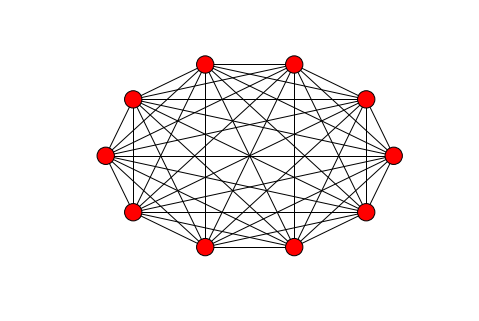

In [145]:
## GRAPH IMPLEMENTATION OF THE TEXT
## Using the NetworkX library and constructing edges
## between the graph only on the basis of semantic
## and syntactic similarity of the two node
G = nx.Graph()
filename = str(raw_input("Enter the name of the document: "))
with open(filename,"r") as text:
    for line in text:
        G.add_node(line)
for nodei in G.nodes():
    for nodej in G.nodes():
        if nodei != nodej:
            #if(statistical(nodei,nodej) >= 0.3):
            G.add_edge(nodei,nodej,weight = (1 - statistical(nodei,nodej) + sentence_semantic(nodei,nodej)),color = 'blue',label = 'stat')
            #if(sentence_semantic(nodei,nodej)):
                #G.add_edge(nodei,nodej,weight = sentence_semantic(nodei,nodej),color = 'green',label = 'sem')
                
print "Number of edges in the graph" + " : " + str(len(G.edges()))
nx.draw_circular(G)
plt.show()

In [146]:
## MAIN VETEX SELECTION
max_val = max(tf.values())
print max_val
for i in tf:
    if tf[i] == max_val:
        main_vertex = i
print main_vertex

0.234567901235
burning tires tear gas and clashes with riot police the ugly scenes that come with workers strikes are all too familiar in france a country constantly trying to balance its culture of workers rights with a more efficient economy



In [147]:
## LEADER VERTICES
lead = []
for i in tf:
    if tf[i] >= (0.75 * max_val):
        lead.append(i)
for i in lead:
    print i

such scenes are being played out across the country friday as unions have called for workers to step up protests that have for the past week crippled parts of france

burning tires tear gas and clashes with riot police the ugly scenes that come with workers strikes are all too familiar in france a country constantly trying to balance its culture of workers rights with a more efficient economy

employees of oil refineries nuclear power plants and some public transportation have left one in three gas stations dry forcing vehicles to search for well stocked stations and causing long lines at the pump

the governments argument is that the strict laws that make french workers among the best protected in the world leave companies in a difficult position where they cant take on new staff

french prime minister manuel valls told local media on thursday that he might be willing to modify some of the proposals giving hope to french people that the protests and fuel shortages may soon stop



In [148]:
## COLOR OF THE EDGES
for i in G.nodes():
    for j in G.nodes():
        if (i,j) in G.edges():
            print G.get_edge_data(i,j)[0]['color']

KeyError: 0

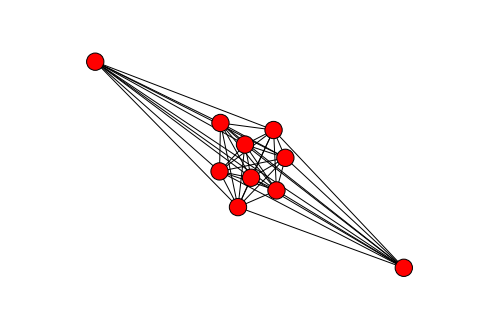

In [149]:
nx.draw(G)

In [150]:
## Applying djikstra to the given graph
shortest = dict()
for i in G.nodes():
    shortest[i] = dict()
    for j in lead:
        shortest[i][j] = (nx.dijkstra_path_length(G,i,j))
for i in shortest:
    print i + "\n" + str(shortest[i]) + '\n'

the workers are protesting a labor reform bill put forward by the government that will make it easier for companies to hire and fire employees

{'burning tires tear gas and clashes with riot police the ugly scenes that come with workers strikes are all too familiar in france a country constantly trying to balance its culture of workers rights with a more efficient economy\n': 3.428709634016486, 'the governments argument is that the strict laws that make french workers among the best protected in the world leave companies in a difficult position where they cant take on new staff\n': 2.5546869796869793, 'french prime minister manuel valls told local media on thursday that he might be willing to modify some of the proposals giving hope to french people that the protests and fuel shortages may soon stop\n': 2.6694149197407397, 'such scenes are being played out across the country friday as unions have called for workers to step up protests that have for the past week crippled parts of franc

In [151]:
## Getting the nearest leader node for each node
cluster = dict()
for i in shortest:
    m = min(shortest[i],key = shortest[i].get)
    cluster[i] = m
for i in cluster:
    print cluster[i]

such scenes are being played out across the country friday as unions have called for workers to step up protests that have for the past week crippled parts of france

such scenes are being played out across the country friday as unions have called for workers to step up protests that have for the past week crippled parts of france

such scenes are being played out across the country friday as unions have called for workers to step up protests that have for the past week crippled parts of france

burning tires tear gas and clashes with riot police the ugly scenes that come with workers strikes are all too familiar in france a country constantly trying to balance its culture of workers rights with a more efficient economy

employees of oil refineries nuclear power plants and some public transportation have left one in three gas stations dry forcing vehicles to search for well stocked stations and causing long lines at the pump

such scenes are being played out across the country friday a

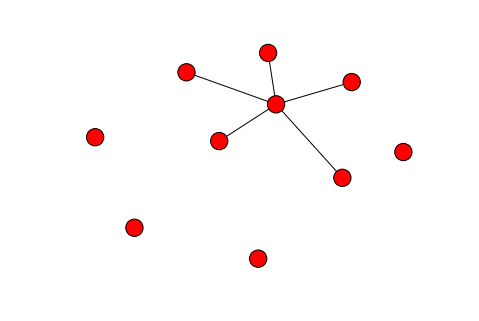

In [152]:
## Deleting the edges other than the leader ones in the graph
K = G.copy()
for nodei,nodej in K.edges():
    if cluster[nodei] != nodej and cluster[nodej] != nodei:
        K.remove_edge(nodei,nodej)
## Prinitng the graph
nx.draw(K)

In [ ]:
p